In [ ]:
pip install pennylane

In [ ]:
from keras.models import load_model

encoder_model = load_model("Enoder_out_64_micro.h5")
encoder_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1, 1412)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1, 2048)             │       2,893,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 1, 2048)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 2048)             │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1, 1024)             │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 1, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1, 1024)             │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1, 512)              │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 1, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1, 512)              │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1, 256)              │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1, 128)              │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1, 64)               │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,705,152 (21.76 MB)

 Trainable params: 5,697,216 (21.73 MB)

 Non-trainable params: 7,936 (31.00 KB)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('corrected_spectrum_micro_data.csv')

scaler = MinMaxScaler(feature_range=(0, 1))  # Normalize between 0 and 1

remove_classes = ["PS", "PC", "NC", "/", "ABS"]
# Filter out rows where 'Plastic' is in remove_classes
data = data[~data['Plastic'].isin(remove_classes)]

print(data.shape)

wave_numbers = data.columns[2:]
spectra = data.iloc[:, 2:]

(264, 1414)


In [ ]:
data['conditn'] = data['Filename'].apply(lambda x: 0 if 'sta' in x else (1 if 'wea' in x else -1))

In [ ]:

all_data = []
for col in range (len(spectra)):
    y = spectra.iloc[col].values.astype(float)
    # Read the file assuming space-separated values
    temp = y.reshape(-1, 1)

    # Normalize between 0 and 1
    temp = scaler.fit_transform(temp)

    # Flatten to 1D and store
    temp = temp.reshape(1, -1)

      # Append to the list
    all_data.append(temp)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
labels = data['Plastic'].astype(str)

In [ ]:
X =  np.array(all_data)
y = encoder.fit_transform(labels)

In [ ]:
X.shape

(264, 1, 1412)

In [ ]:
print(encoder.classes_)

['PA' 'PE' 'PET' 'PP' 'PVC']


In [ ]:
y_bin = data['conditn']
len(y_bin)

264

# 1. AE

In [ ]:
AE_op = encoder_model.predict(X)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


In [ ]:
AE_op.shape

(264, 1, 64)

# 2. PCA

In [ ]:
from sklearn.decomposition import PCA
X_pca = X.squeeze(axis=1)


In [ ]:
pca = PCA(n_components=16)

In [ ]:
X_pca = pca.fit_transform(X_pca)
X_pca.shape

(264, 16)

# 3. LDA

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming your data X is a NumPy array of shape (1200, 1, 16)
X_AE = np.squeeze(AE_op, axis=1)  # Now X is of shape (1200, 16)


In [ ]:
# Initialize LDA with desired number of components; remember that maximum is (n_classes - 1)
lda = LinearDiscriminantAnalysis(n_components=1)
# Fit LDA and transform the data
lda_ae = lda.fit_transform(X_AE, y_bin)
print("Shape of AR data after LDA transformation:", lda_ae.shape)

Shape of AR data after LDA transformation: (264, 1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def plot_lda_1d(lda_transformed, labels):
    """
    Plots 1D LDA transformed data with color-coded classes.

    Parameters:
    - lda_transformed: numpy array of shape (n_samples, 1)
    - labels: class labels
    """
    lda_transformed = lda_transformed.flatten()  # Ensure it's 1D
    unique_labels = np.unique(labels)
    colors = sns.color_palette("husl", len(unique_labels))

    plt.figure(figsize=(10, 3))

    for i, label in enumerate(unique_labels):
        idx = labels == label
        plt.scatter(lda_transformed[idx], [i] * np.sum(idx),
                    color=colors[i], label=f'Class {label}', alpha=0.7, edgecolors='k')

    plt.xlabel("LDA Component 1")
    plt.yticks(range(len(unique_labels)), [f'Class {l}' for l in unique_labels])  # Label y-axis
    plt.title("1D LDA Scatter Plot")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# Example Usage
# plot_lda_1d(lda_transformed, labels)


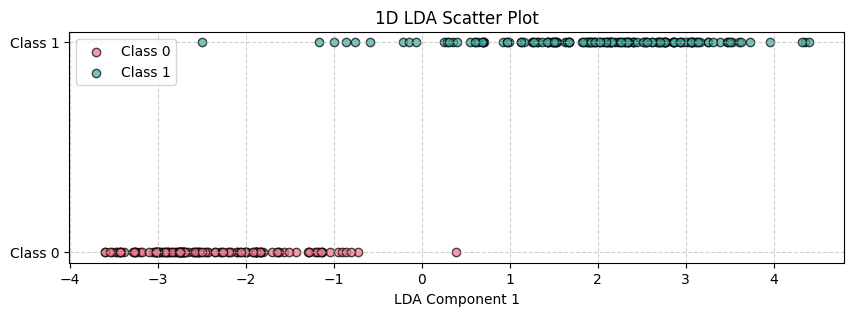

In [ ]:
plot_lda_1d(lda_ae,y_bin)

In [ ]:
lda2 = LinearDiscriminantAnalysis(n_components=1)
# Fit LDA and transform the data
lda_pca = lda2.fit_transform(X_pca, y_bin)
print("Shape  of PCA data after LDA transformation:", lda_pca.shape)

Shape  of PCA data after LDA transformation: (264, 1)


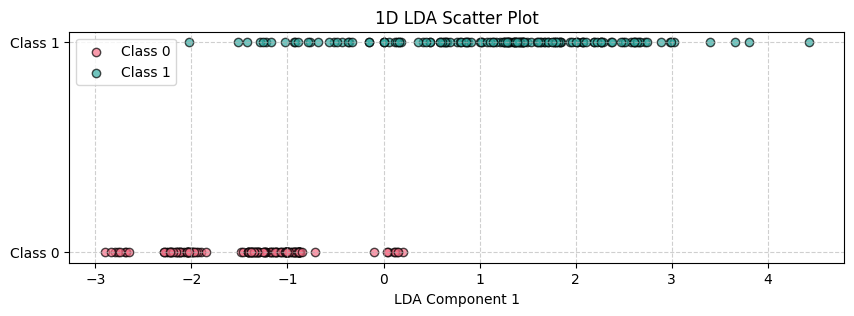

In [ ]:
plot_lda_1d(lda_pca,y_bin)

In [ ]:
vqc_data = np.concatenate((lda_ae, lda_pca), axis=1)
print("Concatenated vertically:\n", vqc_data.shape)

Concatenated vertically:
 (264, 2)


# 4. VQC

In [ ]:
type(vqc_data)

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split
import pennylane as qml
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

Epoch 0: Loss = 0.0600, Accuracy = 75.83%
Epoch 1: Loss = 0.0481, Accuracy = 91.00%
Epoch 2: Loss = 0.0469, Accuracy = 91.47%
Epoch 3: Loss = 0.0471, Accuracy = 92.42%
Epoch 4: Loss = 0.0470, Accuracy = 92.42%
Epoch 5: Loss = 0.0470, Accuracy = 92.42%
Epoch 6: Loss = 0.0470, Accuracy = 92.42%
Epoch 7: Loss = 0.0471, Accuracy = 92.42%
Epoch 8: Loss = 0.0471, Accuracy = 92.42%
Epoch 9: Loss = 0.0471, Accuracy = 92.42%
Epoch 10: Loss = 0.0471, Accuracy = 92.42%
Epoch 11: Loss = 0.0471, Accuracy = 92.42%
Epoch 12: Loss = 0.0471, Accuracy = 92.42%
Epoch 13: Loss = 0.0471, Accuracy = 92.42%
Epoch 14: Loss = 0.0471, Accuracy = 92.42%
Epoch 15: Loss = 0.0471, Accuracy = 92.42%
Epoch 16: Loss = 0.0471, Accuracy = 92.42%
Epoch 17: Loss = 0.0471, Accuracy = 92.42%
Epoch 18: Loss = 0.0471, Accuracy = 92.42%
Epoch 19: Loss = 0.0471, Accuracy = 92.42%

Final Test Accuracy: 94.34%


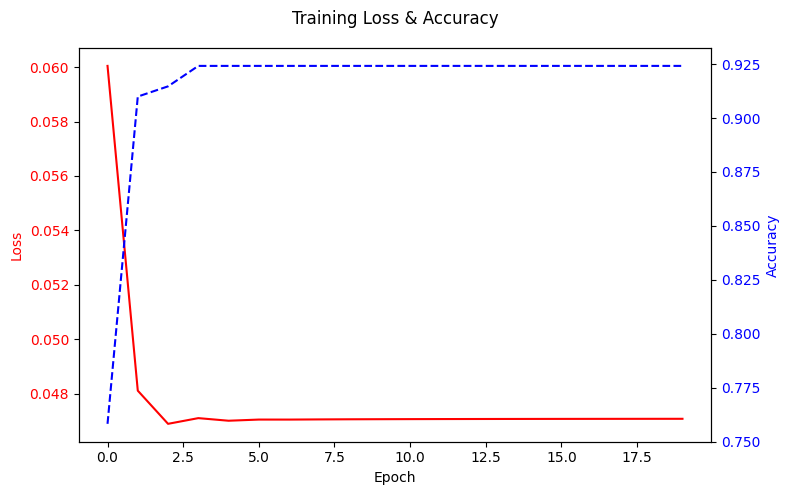

In [40]:
X_train, X_test, y_train, y_test = train_test_split(vqc_data, y_bin.to_numpy(), test_size=0.2, random_state=42,stratify=y_bin)

# Convert to PyTorch Tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Define 2-Qubit Quantum Device
num_qubits = 2
dev = qml.device("default.qubit", wires=num_qubits)

# Quantum Feature Encoding
def feature_encoding(x):
    for i in range(num_qubits):
        qml.RY(x[i], wires=i)

# Variational Quantum Circuit (Trainable)
def variational_circuit(weights):
    for i in range(num_qubits):
        qml.RY(weights[i, 0], wires=i)
        qml.RZ(weights[i, 1], wires=i)

    qml.CNOT(wires=[0, 1])  # Entanglement

    for i in range(num_qubits):
        qml.RY(weights[i, 2], wires=i)

# Define Quantum Node (QNode)
@qml.qnode(dev, interface="torch")
def quantum_circuit(x, weights):
    feature_encoding(x)
    variational_circuit(weights)
    return qml.expval(qml.PauliZ(0))  # Expectation value

# Initialize Trainable Weights
weights = torch.randn((num_qubits, 3), requires_grad=True)

# Binary Cross-Entropy Loss Function
def loss_fn(preds, labels):
    return torch.nn.functional.binary_cross_entropy_with_logits(preds, labels)


optimizer = optim.Adam([weights], lr=0.1)

# Training Loop with Loss & Accuracy Tracking
epochs = 20
batch_size = 10
loss_history = []
accuracy_history = []

for epoch in range(epochs):
    total_loss = 0
    correct = 0
    total = 0

    for i in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]

        preds = torch.stack([quantum_circuit(x, weights) for x in batch_X]).reshape(-1, 1)
        loss = loss_fn(preds, batch_y)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Compute Accuracy in Training
        preds_rounded = torch.sigmoid(preds).round()
        correct += (preds_rounded == batch_y).sum().item()
        total += batch_y.size(0)

    loss_history.append(total_loss / len(X_train))
    accuracy_history.append(correct / total)


    print(f"Epoch {epoch}: Loss = {loss_history[-1]:.4f}, Accuracy = {accuracy_history[-1] * 100:.2f}%")

# Evaluate on Test Set
with torch.no_grad():
    preds = torch.stack([quantum_circuit(x, weights) for x in X_test]).reshape(-1, 1)
    preds = torch.sigmoid(preds).round()

accuracy = (preds == y_test).float().mean().item()
print(f"\nFinal Test Accuracy: {accuracy * 100:.2f}%")

# Plot Loss and Accuracy
fig, ax1 = plt.subplots(figsize=(8, 5))

# Loss Curve
ax1.plot(loss_history, label="Loss", color="red", linestyle="-")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Accuracy Curve
ax2 = ax1.twinx()
ax2.plot(accuracy_history, label="Accuracy", color="blue", linestyle="--")
ax2.set_ylabel("Accuracy", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

fig.suptitle("Training Loss & Accuracy")
fig.tight_layout()
plt.show()


In [35]:
from sklearn.metrics import classification_report

# Convert predictions and true labels to NumPy for sklearn compatibility
y_pred = preds.numpy()
y_true = y_test.numpy()

# Generate classification report
report = classification_report(y_true, y_pred, target_names=["Standard", "Weathered"])
print("\nClassification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

    Standard       0.89      1.00      0.94        24
   Weathered       1.00      0.90      0.95        29

    accuracy                           0.94        53
   macro avg       0.94      0.95      0.94        53
weighted avg       0.95      0.94      0.94        53



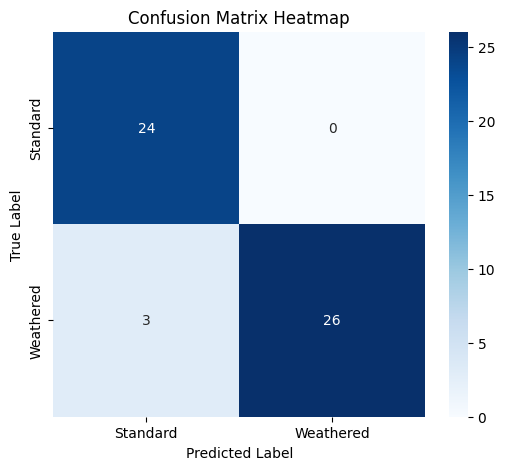

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Standard", "Weathered"], yticklabels=["Standard", "Weathered"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()
